In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                     #Exploratory data Analysis

In [2]:
data=pd.read_csv(r"M:\Quality Water\archive\water_potability.csv")

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
data.shape

(3276, 10)

# Data Cleaning

In [5]:
data.info()      #Sulphate has less rows so we have null values there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data.isnull().sum() # Ph has 491 null rows, Sulfate has 781(20%) etc so we need to put some values as data cant be null

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
data=data.fillna(data.mean(),)      # inplace=True
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [16]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Checking of we need to do dimensionality reduction

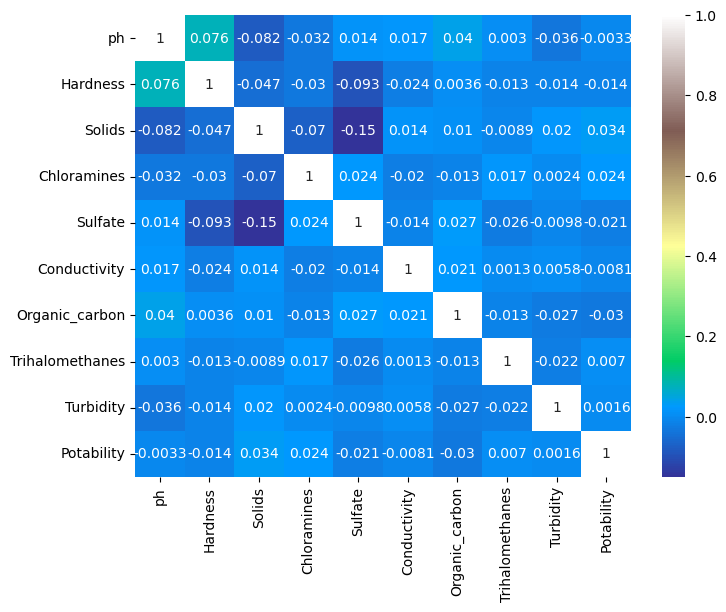

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')  # If two features are correlated means 70-80% we need to remove 1 feature.
fig=plt.gcf()                                       # but here no two features are correlating, less choices more accuracy
fig.set_size_inches(8,6)
plt.show()

### Lets check the Outlier using Box Plot

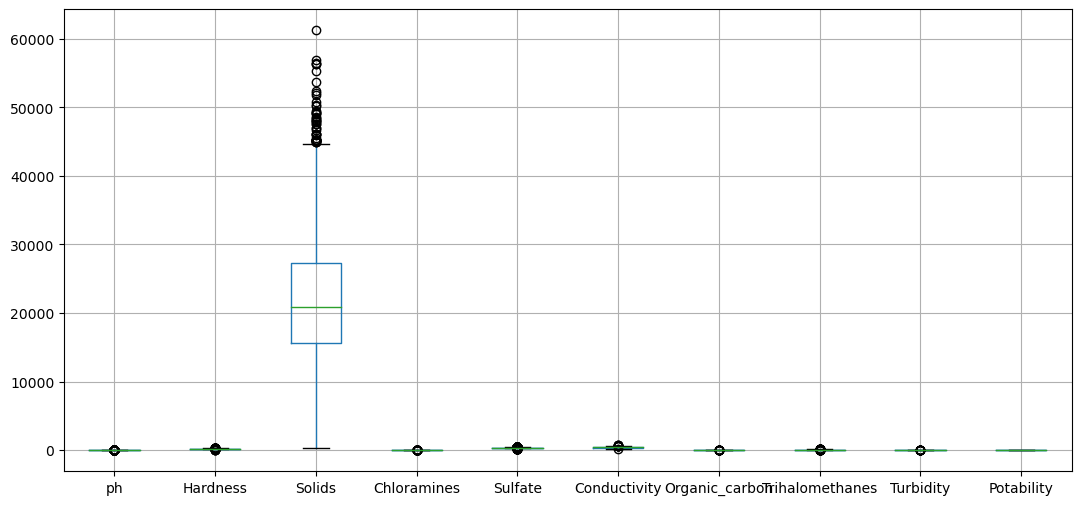

In [40]:
data.boxplot(figsize=(13,6))
plt.show()

In [31]:
data['Solids'].describe() #We will not remove the outliers because these  outliers may be required to check quality of water

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

### Label encoding means to convert string to intergers as we dont have data in string format so will not do label encoding here.

## MORE EDA

In [32]:
data.shape

(3276, 10)

In [46]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

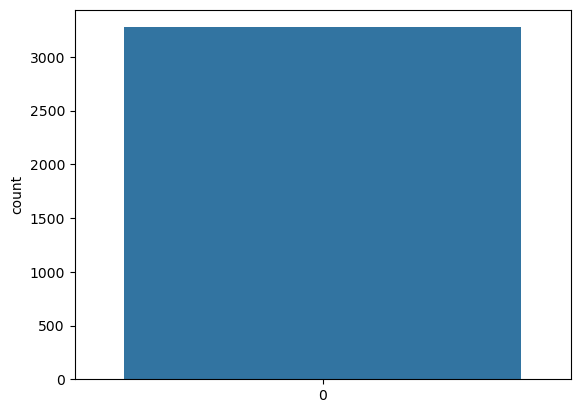

In [47]:
sns.countplot(data['Potability'])
plt.show()

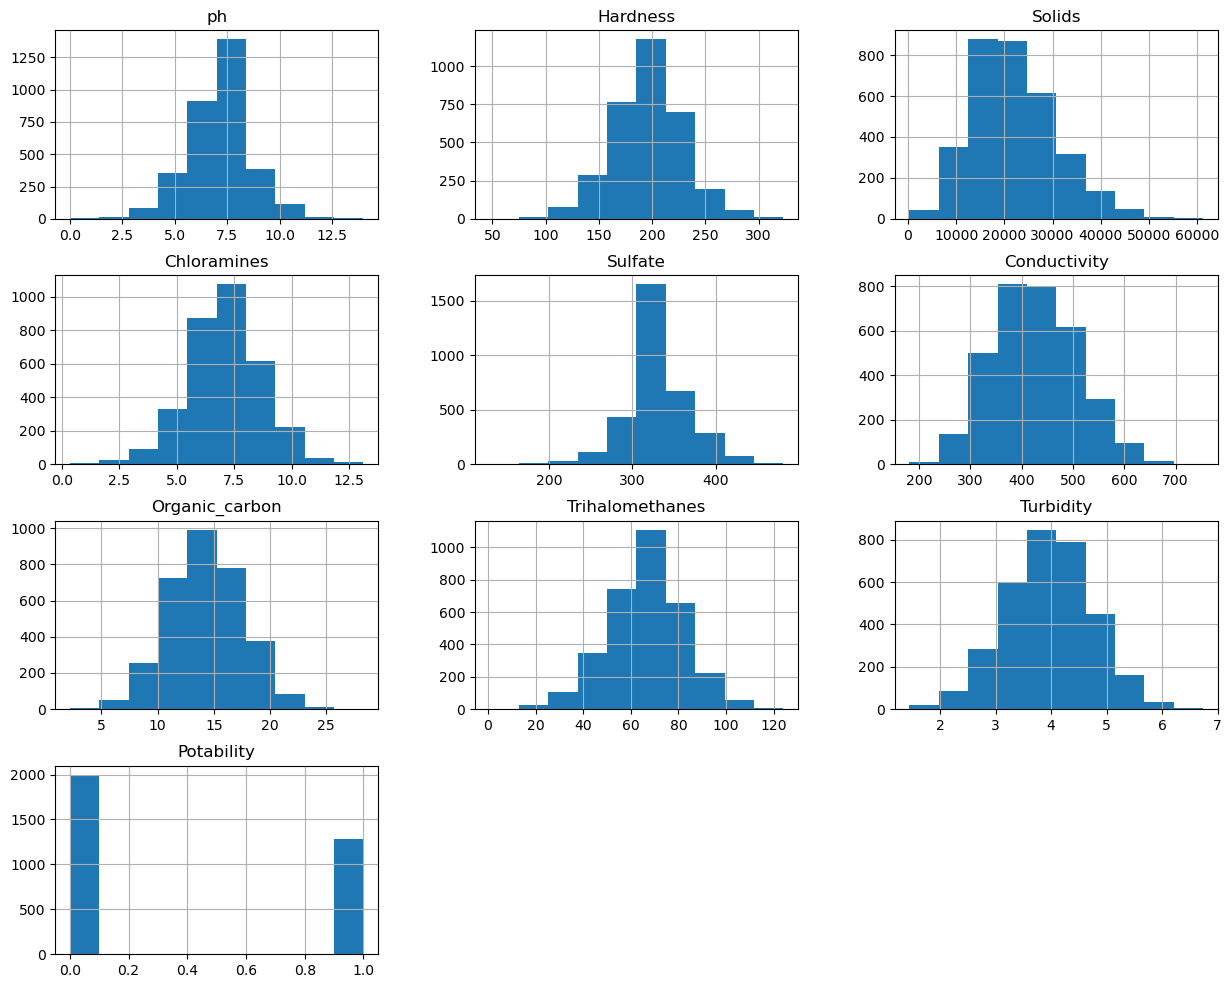

In [48]:
data.hist(figsize=(15,12))
plt.show()            # All inputs are normally distributed and not biased hence data is good

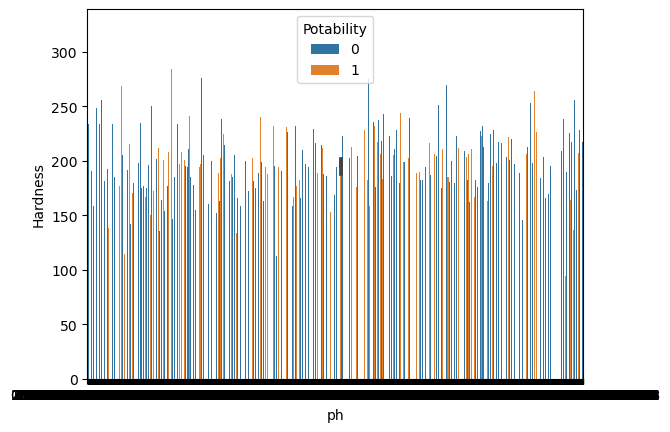

In [51]:
sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
plt.show()

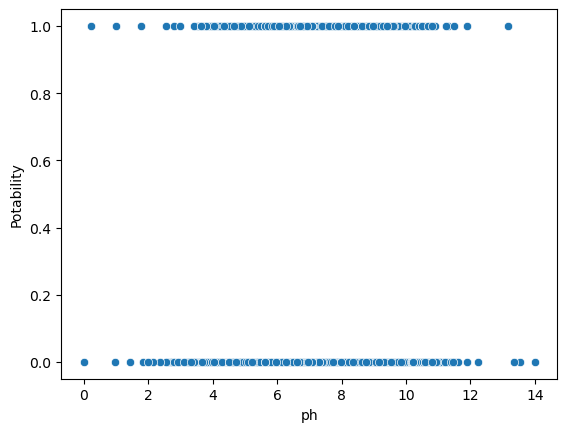

In [52]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

# Paritioning

In [59]:
X=data.drop('Potability',axis=1)   #Input data and potability is in columns so thats why axis=1
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [60]:
Y=data['Potability']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=None) # random_state=any integer data will be same

In [109]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
486,8.675193,200.735941,15049.584199,8.630381,356.805465,441.298088,17.853054,74.586511,4.978575
1368,6.336267,228.455028,29342.709756,6.963478,333.775777,398.181884,15.545029,92.011257,3.745725
488,8.570129,200.071875,9782.344284,5.661697,333.775777,511.161511,11.856089,66.048413,4.604405
683,4.595608,204.859660,13891.038530,6.371345,333.775777,631.822078,11.420910,70.449003,3.978920
806,4.739549,162.246886,27215.902742,2.862535,372.815075,437.217590,15.130476,65.091291,2.942348
...,...,...,...,...,...,...,...,...,...
674,4.931958,164.666769,31155.540218,7.411483,383.782626,506.531414,14.980034,69.249229,5.045983
2205,6.852899,158.079791,11914.463778,7.634967,386.167384,473.643343,16.939374,62.695471,4.594761
2892,3.795133,178.432920,27179.404820,6.481019,333.775777,365.491679,12.350038,73.809577,3.185083
2449,4.439096,190.153449,20864.340465,2.386653,333.775777,515.631205,18.081003,63.363082,3.844231


In [110]:
## We need not to do Normalization because trees are not skewed, data is already Normalized.

# MODEL TRAINING

In [139]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [112]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [113]:
Y_test

2672    0
269     1
1762    0
140     0
1060    0
       ..
3111    0
1398    0
1217    1
636     0
213     0
Name: Potability, Length: 656, dtype: int64

In [114]:
Y_prediction=dt.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [117]:
accuracy_score(Y_prediction,Y_test)*100

61.737804878048784

In [118]:
## Model accuracy depends upon domain like in Self driving cars even 95% is not good as we need to be very much accurate (100%)
## If Physiotherapy or Counsellers dealing with brains if we can achieve 50% accuracy it is good.

In [121]:
confusion_matrix(Y_prediction,Y_test)

array([[296, 117],
       [134, 109]], dtype=int64)

In [122]:
Y_test.shape

(656,)

In [ ]:
       #### HERE ACCURACY ACHIEVED IS ABOUT 61% using Decision Tree Classifier